<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/6_exercicio_correlacao_regressao/exercicio_correlacao_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Exercício Correlação e Regressão

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf

## Dados

In [2]:
df_house = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Correlação & Regressão/kc_house_data.xls')
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [4]:
df_car = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Correlação & Regressão/car_price.xls')
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

## Questões

### house

#### 1.
Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço *price* e o número de quartos *bedrooms*? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total *sqft_living* superior a 2000 pés quadrados?

In [6]:
correlation_matrix = df_house.corr(numeric_only=True)
print("Correlação entre price e bedrooms:", correlation_matrix.loc['price', 'bedrooms'])

# Apenas casas com sqft_living > 2000
filtered_house = df_house[df_house['sqft_living'] > 2000]
filtered_corr = filtered_house.corr(numeric_only=True)
print("Correlação para sqft_living > 2000:", filtered_corr.loc['price', 'bedrooms'])


Correlação entre price e bedrooms: 0.299207216169182
Correlação para sqft_living > 2000: 0.11912115548964207


#### 2.
Existe alguma correlação entre o preço *price* e a área total da casa *sqft_living* , considerando apenas casas com pelo menos dois banheiros bathrooms?

In [7]:
filtered_house2 = df_house[df_house['bathrooms'] >= 2]
print("Correlação:", filtered_house2[['price', 'sqft_living']].corr().loc['price', 'sqft_living'])

Correlação: 0.7067107107996191


#### 3.
Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa *sqft_living* e o preço price?

In [8]:
for b in sorted(df_house['bathrooms'].unique()):
    subset = df_house[df_house['bathrooms'] == b]
    if len(subset) > 10:
        corr = subset[['price', 'sqft_living']].corr().loc['price', 'sqft_living']
        print(f"Banheiros: {b}, Correlação: {corr:.2f}")

Banheiros: 0.75, Correlação: 0.36
Banheiros: 1.0, Correlação: 0.36
Banheiros: 1.5, Correlação: 0.42
Banheiros: 1.75, Correlação: 0.45
Banheiros: 2.0, Correlação: 0.45
Banheiros: 2.25, Correlação: 0.60
Banheiros: 2.5, Correlação: 0.56
Banheiros: 2.75, Correlação: 0.52
Banheiros: 3.0, Correlação: 0.57
Banheiros: 3.25, Correlação: 0.54
Banheiros: 3.5, Correlação: 0.57
Banheiros: 3.75, Correlação: 0.47
Banheiros: 4.0, Correlação: 0.58
Banheiros: 4.25, Correlação: 0.44
Banheiros: 4.5, Correlação: 0.80
Banheiros: 4.75, Correlação: 0.65
Banheiros: 5.0, Correlação: 0.75


#### 4.
Qual é a relação entre a condição da casa condition e o preço *price*, considerando apenas casas com uma área total *sqft_living* superior a 3000 pés quadrados?

In [9]:
subset = df_house[df_house['sqft_living'] > 3000]
correlation = subset[['condition', 'price']].corr().loc['price', 'condition']
print("Correlação condition x price:", correlation)


Correlação condition x price: 0.10527844723732628


#### 5.
Existe alguma correlação entre a localização geográfica *lat* e *long* e o preço *price* para casas com pelo menos três quartos bedrooms?

In [10]:
subset = df_house[df_house['bedrooms'] >= 3]
print(subset[['lat', 'long', 'price']].corr().loc['price', ['lat', 'long']])


lat     0.312555
long   -0.007275
Name: price, dtype: float64


#### 6.
Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [11]:
df_house['waterfront'].value_counts(dropna=False)


,count
waterfront,
n,9920
y,79


In [12]:
anova = stats.f_oneway(df_house[df_house['waterfront'] == "y"]['price'], df_house[df_house['waterfront'] == "n"]['price'])
print("ANOVA - p-value:", anova.pvalue)

ANOVA - p-value: 2.97380815121432e-202


### car

#### 7.
Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

In [13]:
car_corr = df_car.corr(numeric_only=True)
print(car_corr)

# Exemplos:
print("Positiva:", car_corr.loc['Price'].sort_values(ascending=False).iloc[1])
print("Negativa:", car_corr.loc['Price'].sort_values().iloc[1])
print("Neutra:", car_corr.loc['Price'].abs().sort_values().iloc[1])



                       Price      Year  Kilometer    Length     Width  \
Price               1.000000  0.309381  -0.147276  0.568875  0.577100   
Year                0.309381  1.000000  -0.291740  0.085178  0.182220   
Kilometer          -0.147276 -0.291740   1.000000  0.037817  0.008479   
Length              0.568875  0.085178   0.037817  1.000000  0.797228   
Width               0.577100  0.182220   0.008479  0.797228  1.000000   
Height              0.092968  0.126849   0.085728  0.194704  0.326928   
Seating Capacity   -0.024879 -0.000113   0.111103  0.298527  0.229056   
Fuel Tank Capacity  0.586109  0.044859   0.052447  0.809812  0.791316   

                      Height  Seating Capacity  Fuel Tank Capacity  
Price               0.092968         -0.024879            0.586109  
Year                0.126849         -0.000113            0.044859  
Kilometer           0.085728          0.111103            0.052447  
Length              0.194704          0.298527            0.809812

#### 8.
Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse *Price*.

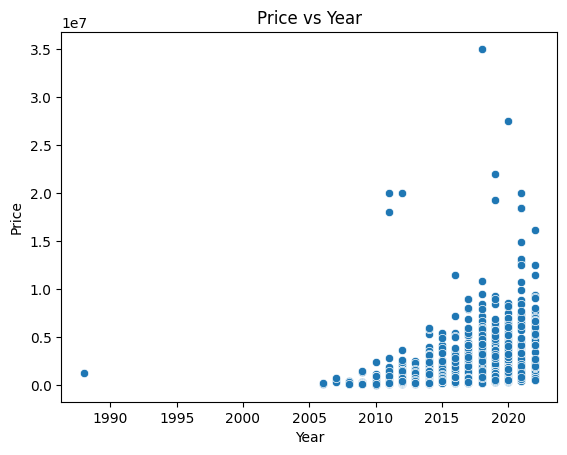

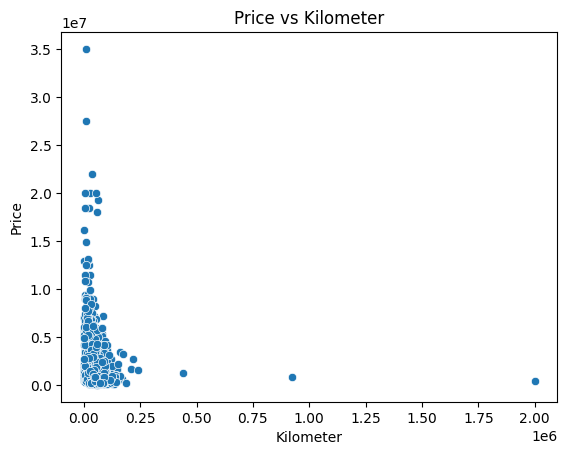

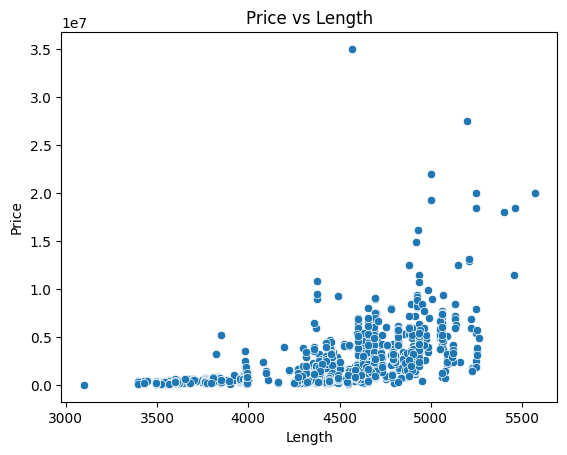

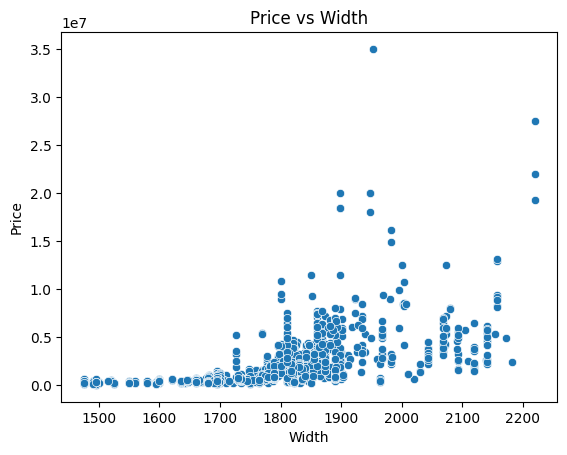

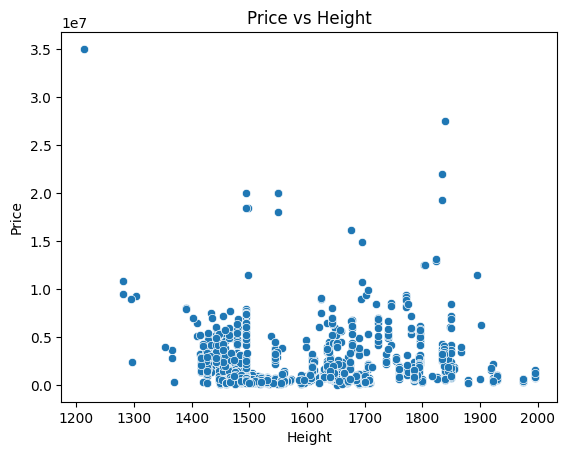

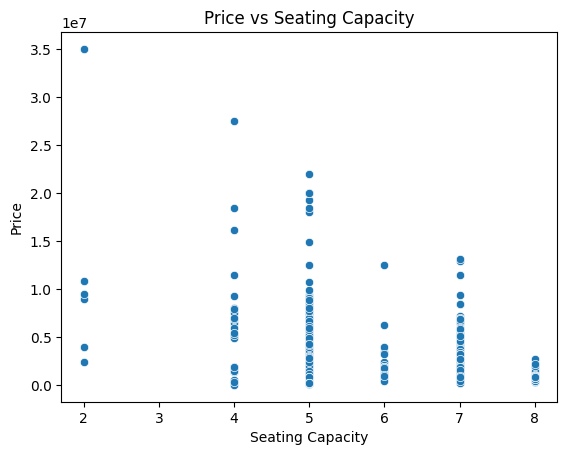

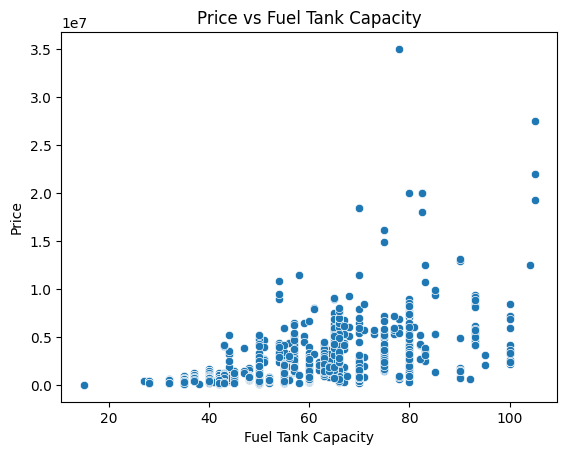

In [14]:
numeric_cols = df_car.select_dtypes(include=[np.number]).columns.drop('Price')

for col in numeric_cols:
    sns.scatterplot(data=df_car, x=col, y='Price')
    plt.title(f'Price vs {col}')
    plt.show()


#### 9.
Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o *plot* da Reta Estimada.

In [15]:
# Garantir que não há valores nulos nas colunas
df_car_model = df_car[['Engine', 'Price']].dropna()

# Modelo de Regressão Linear Simples
model = smf.ols('Price ~ Engine', data=df_car_model).fit()

# Tabela com os coeficientes da regressão
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     51.86
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        19:25:50   Log-Likelihood:                -28907.
No. Observations:                1874   AIC:                         5.802e+04
Df Residuals:                    1770   BIC:                         5.860e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.345e+05    8.8e+05      0.494      0.622   -1.29e+06    2.16e+06
Engine[T.1061 cc]  -2.55e+05   1.08e+06     -0.236      0.813   -2.37e+06    1.86e+06
Engine[T.1086 cc] -1.151e+05   9.15e+05     -0.126      0.900   -1.91e+06    1.68e+06
Engine[T.1120 cc] -2.417e+04   1.02e+06     -0.024      0.981   -2.02e+06    1.97e+06
Engine[T.1186 cc] -1.575e+04   1.08e+06     -0.015      0.988   -2.13e+06     2.1e+06
Engine[T.1196 cc]  1.819e+04   9.46e+05      0.019      0.985   -1.84e+06    1.87e+06
Engine[T.1197 cc]  1.239e+05   8.84e+05      0.140      0.889   -1.61e+06    1.86e+06
Engine[T.1198 cc]  3.457e+04   9.02e+05      0.038      0.969   -1.73e+06     1.8e+06
Engine[T.1199 cc]  1.632e+05   8.99e+05      0.181      0.856    -1.6e+06    1.93e+06
Engine[T.1248 cc]  2.099e+05   8.88e+05      0.236      0.813   -1.53e+06    1.95e+06
Engine[T.1298 cc]  -1.77e+05   1.08e+06     -0.164      0.870   -2.29e+06    1.94e+06
Engine[T.1332 cc]   3.69e+06   1.25e+06      2.964      0.003    1.25e+06    6.13e+06
Engine[T.1336 cc] -7.617e+04   1.14e+06     -0.067      0.947   -2.31e+06    2.15e+06
Engine[T.1353 cc]  1.338e+06   9.64e+05      1.387      0.165   -5.53e+05    3.23e+06
Engine[T.1364 cc]  4.464e+04   9.98e+05      0.045      0.964   -1.91e+06       2e+06
Engine[T.1368 cc]  1.361e+06   9.98e+05      1.363      0.173   -5.97e+05    3.32e+06
Engine[T.1373 cc]  2.819e+05   9.16e+05      0.308      0.758   -1.52e+06    2.08e+06
Engine[T.1395 cc]  2.569e+06   1.04e+06      2.467      0.014    5.26e+05    4.61e+06
Engine[T.1396 cc]  3.154e+05   9.18e+05      0.344      0.731   -1.48e+06    2.12e+06
Engine[T.1399 cc] -1.848e+05   1.08e+06     -0.171      0.864    -2.3e+06    1.93e+06
Engine[T.1451 cc]   1.44e+06   1.08e+06      1.336      0.182   -6.74e+05    3.56e+06
Engine[T.1461 cc]  7.377e+04   9.14e+05      0.081      0.936   -1.72e+06    1.87e+06
Engine[T.1462 cc]  5.792e+05   9.28e+05      0.624      0.533   -1.24e+06     2.4e+06
Engine[T.1493 cc]  8.417e+05   9.07e+05      0.927      0.354   -9.38e+05    2.62e+06
Engine[T.1495 cc]  -3.45e+04   1.52e+06     -0.023      0.982   -3.03e+06    2.96e+06
Engine[T.1496 cc]  1.315e+06   9.64e+05      1.364      0.173   -5.77e+05    3.21e+06
Engine[T.1497 cc]  3.945e+05   8.91e+05      0.443      0.658   -1.35e+06    2.14e+06
Engine[T.1498 cc]  2.462e+05   8.94e+05      0.275      0.783   -1.51e+06       2e+06
Engine[T.1499 cc]  1.293e+05   1.08e+06      0.120      0.905   -1.99e+06    2.24e+06
Engine[T.1582 cc]  4.703e+05   8.96e+05      0.525      0.600   -1.29e+06    2.23e+06
Engine[T.1591 cc]  5.084e+05   9.01e+05      0.564      0.573   -1.26e+06    2.28e+06
Engine[T.1595 cc]  7.822e+05   1.14e+06      0.688      0.491   -1.45e+06    3.01e+06
Engine[T.1598 cc]  1.938e+05    9.1e+05      0.213      0.831   -1.59e+06

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

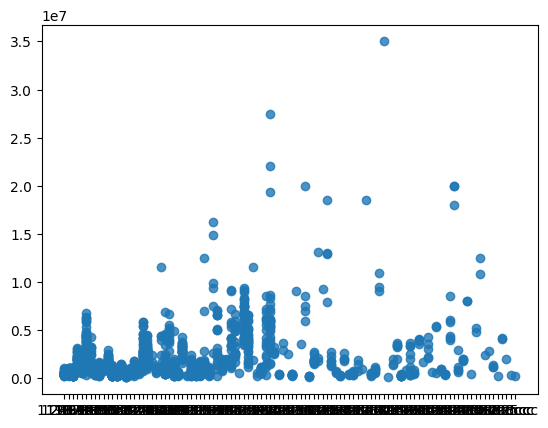

In [16]:
sns.regplot(data=df_car_model, x='Engine', y='Price', line_kws={"color": "red"})
plt.xlabel('Engine')
plt.ylabel('Price')
plt.title('Regressão Linear Simples: Engine vs Price')
plt.show()


#### 10.
Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

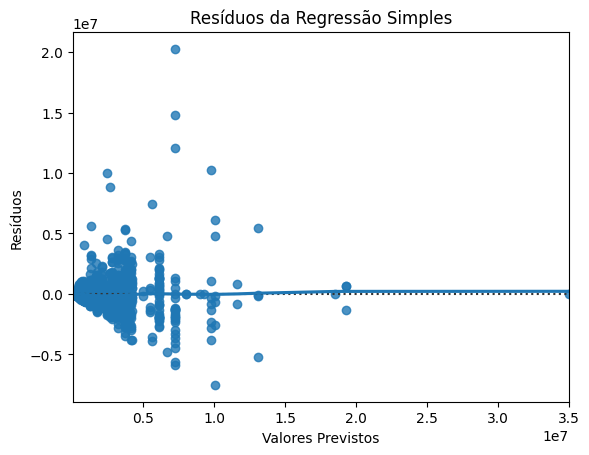

In [17]:
residuals = model.resid
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos da Regressão Simples")
plt.show()


#### 11.
Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [18]:
df_car.rename(columns={'Fuel Tank Capacity': 'FuelTankCapacity'}, inplace=True)
df_car.rename(columns={'Seating Capacity': 'SeatingCapacity'}, inplace=True)

In [19]:
numeric_cols = df_car.select_dtypes(include='number').columns.drop('Price')
numeric_cols

Index(['Year', 'Kilometer', 'Length', 'Width', 'Height', 'SeatingCapacity',
       'FuelTankCapacity'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Tue, 06 May 2025   Prob (F-statistic):          1.49e-278
Time:                        19:28:25   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.677e+08   2.77e+07  

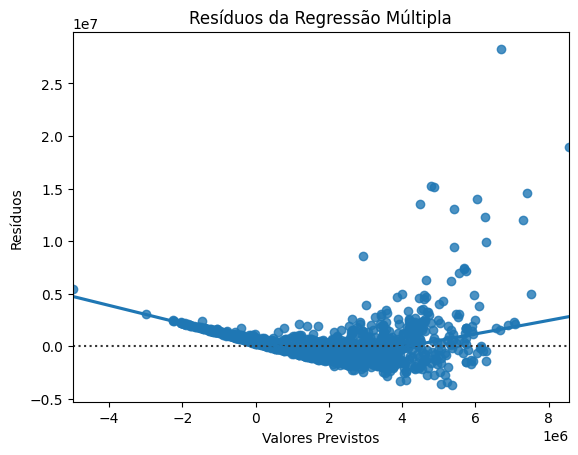

In [20]:
predictors = '+'.join(numeric_cols)
multi_model = smf.ols(f'Price ~ {predictors}', data=df_car).fit()
print(multi_model.summary())

residuals_multi = multi_model.resid
sns.residplot(x=multi_model.fittedvalues, y=residuals_multi, lowess=True)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Resíduos da Regressão Múltipla")
plt.show()
